In [42]:
# Bibliotecas para tratar os dados
import pandas as pd
import numpy as np

# Bibliotecas para EDA
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py
import folium
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar para não exibir warnings
import warnings
warnings.filterwarnings('ignore')

# Configurar para exibir todas as colunas de um dataframe do Pandas
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',60)

# Desativar a notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### IMPORTANDO O DATASET

In [2]:
voos = pd.read_csv('flights_sample_3m.csv')
voos.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.00,-4.00,19.00,1210.00,1443.00,4.00,1501,1447.00,-14.00,0.00,NaN,0.00,186.00,176.00,153.00,1065.00,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.00,-6.00,9.00,2123.00,2232.00,38.00,2315,2310.00,-5.00,0.00,NaN,0.00,235.00,236.00,189.00,1399.00,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.00,6.00,20.00,1020.00,1247.00,5.00,1252,1252.00,0.00,0.00,NaN,0.00,118.00,112.00,87.00,680.00,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.00,-1.00,27.00,1635.00,1844.00,9.00,1829,1853.00,24.00,0.00,NaN,0.00,260.00,285.00,249.00,1589.00,0.00,0.00,24.00,0.00,0.00
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.00,-2.00,15.00,1853.00,2026.00,14.00,2041,2040.00,-1.00,0.00,NaN,0.00,181.00,182.00,153.00,985.00,NaN,NaN,NaN,NaN,NaN


In [3]:
print(f'O dataframe possui {voos.shape[0]} linhas e {voos.shape[1]} colunas.')

O dataframe possui 3000000 linhas e 32 colunas.


In [4]:
voos.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   FL_DATE                  3000000 non-null  object 
 1   AIRLINE                  3000000 non-null  object 
 2   AIRLINE_DOT              3000000 non-null  object 
 3   AIRLINE_CODE             3000000 non-null  object 
 4   DOT_CODE                 3000000 non-null  int64  
 5   FL_NUMBER                3000000 non-null  int64  
 6   ORIGIN                   3000000 non-null  object 
 7   ORIGIN_CITY              3000000 non-null  object 
 8   DEST                     3000000 non-null  object 
 9   DEST_CITY                3000000 non-null  object 
 10  CRS_DEP_TIME             3000000 non-null  int64  
 11  DEP_TIME                 2922385 non-null  float64
 12  DEP_DELAY                2922356 non-null  float64
 13  TAXI_OUT                 2921194 non-null 

A base possui alguns valores nulos - o que pode estar relacionado a diferenciação das informações existentes para voos que partiram no horário, voos atrasados e voos cancelados. Ex.: só há um CANCELLATION_CODE para voos cancelados; o AIR_TIME é válido apenas para voos não cancelados; DELAY_DUE_CARRIER ocorre somente no caso de voos atrasados.  

In [5]:
# Conversão da coluna de data para datetime
voos['FL_DATE'] = pd.to_datetime(voos['FL_DATE'], format='%Y-%m-%d')

#### **EXPLORANDO OS DADOS**

Primeiramente, vamos olhar para a quantidade de voos ao longo do período analisado na base (2019-2023)

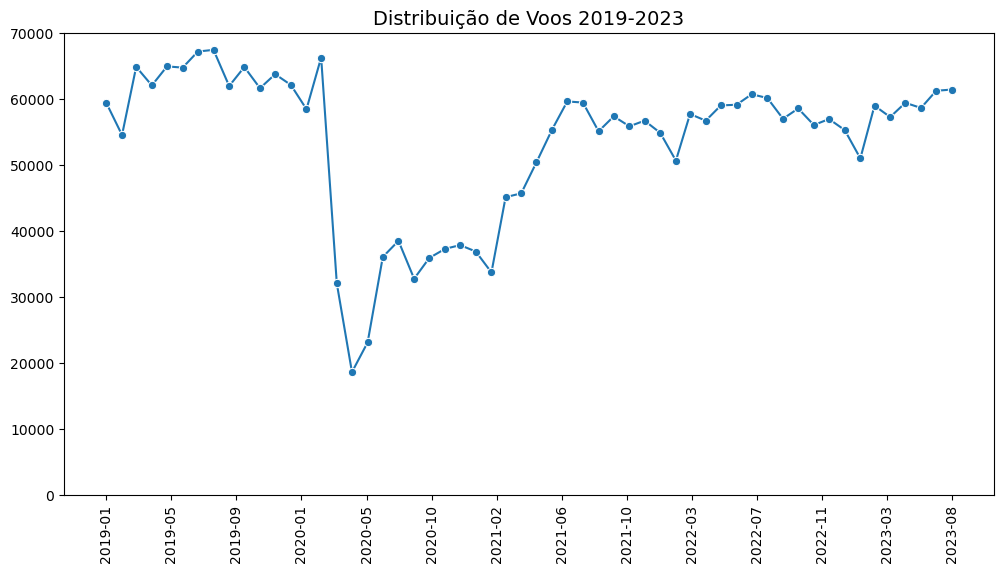

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtro da base apenas das colunas FL_DATE e FL_NUMBER
month = voos[['FL_DATE','FL_NUMBER']]

# Conversão da coluna FL_DATE para mes/ano
month['mes_ano'] = month['FL_DATE'].dt.to_period('M')

# Agrupamento da contagem de voos por mes/ano
grouped_mes_ano = month.groupby(['mes_ano'])['FL_NUMBER'].count().reset_index()
grouped_mes_ano['mes_ano'] = grouped_mes_ano['mes_ano'].dt.to_timestamp()

# Plotagem do gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_mes_ano, x='mes_ano', y='FL_NUMBER', marker='o')

# Configuração dos rótulos e título
plt.title('Distribuição de Voos 2019-2023', fontsize=14)
plt.xlabel(None)
plt.ylabel(None)

# Ajuste valores de mês/ano no eixo X
xticks = pd.date_range(start=grouped_mes_ano['mes_ano'].min(), 
                       end=grouped_mes_ano['mes_ano'].max(), 
                       periods=14) 
plt.xticks(xticks,labels=[d.strftime('%Y-%m') for d in xticks],rotation=90) 

#Ajuste valores do eixo y
plt.yticks(np.linspace(0, 70000, 8))

# Exibição do gráfico
plt.show()

É possível observar que a pandemia da Covid-19 teve impacto significativo na quantidade de voos. Enquanto em março de 2020 havia sido atingido um patamar superior a 66k voos, no mês seguinte, esta quantidade caiu em mais da metade, atingido o nível mínimo em maio de 2020, com pouco mais de 18k voos. Observa-se uma quantidade menor a atingida em 2019 até maio de 2021, quando o número de voos volta a alcaçar patamares superiores a 50k voos.

A seguir, vamos analisar a quantidade de voos por cia aérea.

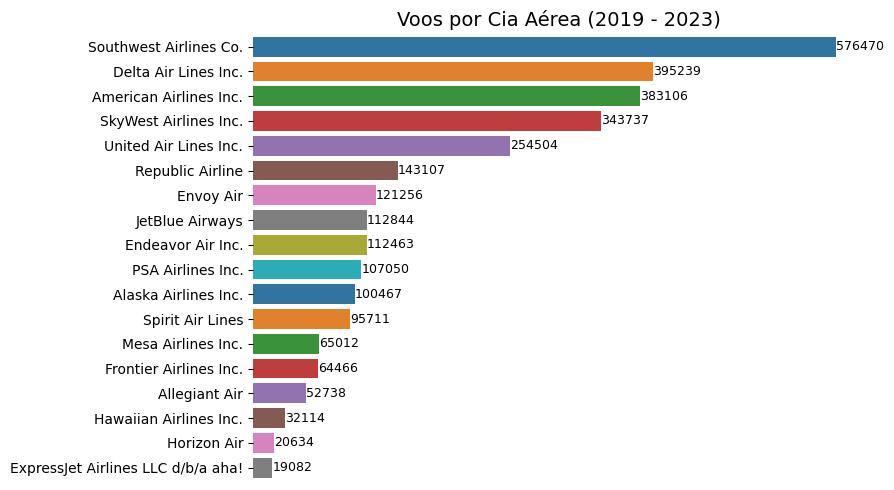

In [7]:
# Agrupamento da base por cia aérea e quantidade de voos realizados
total_voos = voos.groupby('AIRLINE')['FL_NUMBER'].count().sort_values(ascending=False).reset_index(name='total de voos')

# Configuração do tamanho do gráfico
plt.figure(figsize=(9, 5))

# Plotagem do gráfico de barras
sns.barplot(
    data=total_voos, 
    x='total de voos', 
    y='AIRLINE', 
    palette="tab10"  # Cores para diferenciar as companhias
)

# Adicionando os valores nas barras
for index, row in total_voos.iterrows():
    plt.text(
        row['total de voos'] + 1,  # Posição do texto no eixo X
        index,                     # Posição do texto no eixo Y
        f"{row['total de voos']}", # Valor do texto
        va='center',               # Alinhamento vertical
        fontsize=9                 # Tamanho do texto
    )

# Personalização dos eixos e título
plt.title('Voos por Cia Aérea (2019 - 2023)', fontsize=14)
plt.xlabel(None)  # Remove o título do eixo X
plt.ylabel(None)  # Remove o título do eixo Y
plt.xticks([])    # Remove os rótulos do eixo X

# Removendo bordas
sns.despine(left=True, bottom=True)  # Remove as bordas do lado esquerdo e inferior
plt.tight_layout()  # Ajuste automático para evitar sobreposição


# Exibe o gráfico
plt.show()


Algumas informações gerais sobre as cinco primeiras cias aéreas em nº de voos no período:

**Southwest Airlines Co.** é a maior cia aérea de baixo custo do mundo. Sua sede fica em Dallas no Texas;

**Delta Airlines Inc.** é a terceira maior linha aérea do mundo, atrás respectivamente da United Airlines e da American Airlines em tamanho de frota e número de passageiros transportados. Sua sede fica em Atlanta, Geórgia;

**American Airlines Inc.** é sediada em Fort Worth, Texas, e é a maior companhia aérea do mundo por passageiros transportados, quantidade de aeronaves e receitas, sendo a segunda maior pelo número de destinos, somente atrás da United Airlines;

**SkyWest Airlines Inc.** é uma companhia aérea regional americana com sede em St. George, Utah, que opera e mantém aeronaves utilizadas em voos que são programados, comercializados e vendidos por uma companhia aérea principal parceira. A empresa possui contratos com a Alaska Airlines, American Airlines, Delta Air Lines e United Airlines. É a maior companhia aérea regional da América do Norte quando medida pela frota, número de passageiros transportados e número de destinos atendidos;

**United Air Lines Inc.** posui sede em Chicago, Illinois. Pelo tamanho da frota e número de rotas, é a terceira maior companhia aérea do mundo.

A seguir, vamos avaliar a perfomance por cia aérea, inicialmente dos voos que partiram pontualmente ou adiantados.

In [35]:
# Filtro da base apenas para voos partiram no horário e para voos adiantados
on_time = voos.query('DEP_DELAY == 0 and CANCELLED == 0')
adiantados = voos.query('DEP_DELAY <0')

# Agrupamento das bases de voos pontuais e adiantados por cia aérea e quantidade de voos
on_time = on_time.groupby('AIRLINE')['FL_NUMBER'].count().sort_values(ascending=False).reset_index(name='pontuais')
adiantados = adiantados.groupby('AIRLINE')['FL_NUMBER'].count().sort_values(ascending=False).reset_index(name='adiantados')

# Merge das bases de total de voos, voos pontuais e voos adiantados
total_on_time = total_voos.merge(on_time, how='left', on='AIRLINE')
total_on_time = total_on_time.merge(adiantados, how='left', on='AIRLINE')

# Criação de nova coluna com o percentual de voos que partiram no horário ou adiantados
total_on_time['% pontuais'] = round((total_on_time['pontuais']/total_on_time['total de voos'])*100,2)
total_on_time['% adiantados'] = round((total_on_time['adiantados']/total_on_time['total de voos'])*100,2)

# Ordenação da base por percentual de atraso (descrecente)
total_on_time = total_on_time.sort_values(by='% pontuais',ascending=False).reset_index(drop=True)
total_on_time

,AIRLINE,total de voos,pontuais,adiantados,% pontuais,% adiantados
0,Southwest Airlines Co.,576470,38448,253802,6.67,44.03
1,Delta Air Lines Inc.,395239,23669,247153,5.99,62.53
2,Allegiant Air,52738,2719,28523,5.16,54.08
3,Spirit Air Lines,95711,4860,54565,5.08,57.01
4,Mesa Airlines Inc.,65012,3242,42003,4.99,64.61
5,Horizon Air,20634,1005,13306,4.87,64.49
6,SkyWest Airlines Inc.,343737,16724,236091,4.87,68.68
7,Hawaiian Airlines Inc.,32114,1378,18401,4.29,57.30
8,United Air Lines Inc.,254504,10441,150585,4.10,59.17
9,American Airlines Inc.,383106,15027,225917,3.92,58.97


Chama a atenção o elevado percentual de voos que partem adiantados. Para a cia aérea Endeavor Air Inc., este percentual atinge mais de 75%, enquanto o menor percentual é praticado pela Southwest Airlines Co., que é de 44% (ainda elevado).

Vamos avaliar o tempo médio, mínimo, máximo e desvio padrão (em minutos) que os voos foram andiantados, tanto na visão geral como por cia aérea.

In [9]:
# Filtro da base para voos com atraso menor do que zero (ou seja, adiantados)
tempo_adiantados = voos.query('DEP_DELAY <0')

# Agrupamento por cia aérea e tempo médio, mínimo, máximo e desvio padrão dos voos adiantados
tempo_adiantados2 = tempo_adiantados.groupby('AIRLINE')['DEP_DELAY'].agg(['mean','min','max','std']).sort_values(by='mean').reset_index()

display(tempo_adiantados['DEP_DELAY'].describe().reset_index())
display(tempo_adiantados2)

,index,DEP_DELAY
0,count,1787569.00
1,mean,-5.40
2,std,3.34
3,min,-90.00
4,25%,-7.00
5,50%,-5.00
6,75%,-3.00
7,max,-1.00


,AIRLINE,mean,min,max,std
0,Allegiant Air,-8.53,-51.00,-1.00,5.44
1,Alaska Airlines Inc.,-7.52,-73.00,-1.00,4.72
2,Frontier Airlines Inc.,-7.23,-46.00,-1.00,3.86
3,JetBlue Airways,-7.21,-62.00,-1.00,4.06
4,ExpressJet Airlines LLC d/b/a aha!,-6.91,-54.00,-1.00,3.60
5,PSA Airlines Inc.,-6.50,-43.00,-1.00,3.27
6,Republic Airline,-6.08,-66.00,-1.00,3.09
7,SkyWest Airlines Inc.,-5.70,-68.00,-1.00,3.44
8,Mesa Airlines Inc.,-5.57,-56.00,-1.00,3.31
9,United Air Lines Inc.,-5.52,-82.00,-1.00,3.21


Ao avaliarmos o panorama geral, a média de tempo (em minutos) que os voos partiram antecipadamente foi de menos de 6 minutos, com desvio padrão de apenas 3,34 minutos. Quando olhamos para a visão por cia aérea, a maior média é da cia Allegiant Air, com 8,53 minutos e desvio padrão de 5,44. Embora tanto a média com desvio padrão sejam baixos, é possível observar que para todas cias aéras, o maior tempo antecipado que os voos partiram supera os 30 minutos, sendo que para sete delas, supera até mesmo 60 minutos/1 hora.

Agora vamos olhar para a performance das cias aéreas com relação aos voos atrasados e cancelados

In [12]:
# Filtro da base apenas para voos atrasados e que não foram cancelados
atrasados = voos.query('DEP_DELAY > 0 and CANCELLED == 0')

# Agrupamento da contagem de voos atrasados por cia aérea
grouped_atrasados = atrasados.groupby('AIRLINE')['FL_NUMBER'].count().reset_index(name='voos atrasados').sort_values(by='voos atrasados',ascending=False)

# Merge das bases de total de voos e voos atrasados
percent = total_voos.merge(grouped_atrasados, how='left', on='AIRLINE')

# Filtro da base apenas para voos cancelados
cancelados = voos.query('CANCELLED == 1')

# Agrupamento da contagem de voos cancelados por cia aérea
cancelados2 = cancelados.groupby('AIRLINE')['FL_NUMBER'].count().reset_index(name='voos cancelados').sort_values(by='voos cancelados',ascending=False)

# Novo merge, desta vez com a base de cancelados
percent = percent.merge(cancelados2, how='left', on='AIRLINE')

# Criação de novas colunas com o percentual de atraso e de cancelamento
percent['% atraso'] = round((percent['voos atrasados']/percent['total de voos'])*100,2)
percent['% cancelamento'] = round((percent['voos cancelados']/percent['total de voos'])*100,2)

# Ordenação da base por percentual de atraso (descrecente)
percent = percent.sort_values(by='% atraso',ascending=False).reset_index(drop=True)
percent

,AIRLINE,total de voos,voos atrasados,voos cancelados,% atraso,% cancelamento
0,Southwest Airlines Co.,576470,264789,19465,45.93,3.38
1,JetBlue Airways,112844,45385,3039,40.22,2.69
2,Frontier Airlines Inc.,64466,25078,1666,38.90,2.58
3,Hawaiian Airlines Inc.,32114,11947,388,37.20,1.21
4,Allegiant Air,52738,19117,2383,36.25,4.52
5,Spirit Air Lines,95711,33981,2312,35.50,2.42
6,United Air Lines Inc.,254504,87968,5536,34.56,2.18
7,American Airlines Inc.,383106,131311,10907,34.28,2.85
8,Alaska Airlines Inc.,100467,31915,1934,31.77,1.93
9,Delta Air Lines Inc.,395239,118461,5982,29.97,1.51


Quando avaliamos o percentual de atraso e cancelamento dos voos, os principais pontos observados em relação a comparação de diferença de posição nos rankings são os seguintes:

* Southwest Airlines Co. - ocupa a 1ª posição em total de voos e percentual de atraso. Quando avaliamos o percentual de cancelamento, está na 4ª posição;

* Delta Air Lines Inc. - é a 2ª em nº de voos, mas quando olhamos para o percentual de atraso, está na 10ª posição. Quanto ao percentual de cancelamento, ocupa a penúltima posição (17ª);

* American Airlines Inc. - está na 3ª posição em total de voos, mas quando olhamos para percentual de atraso e cancelamento, em ambos os casos está na 8ª posição;

* Skywest Airlines Inc. - está na 4ª posição no total de voos, mas é apenas a 16ª em voos atrasados e 12ª em voos cancelados;

* United Air Lines Inc. - é a 5ª em total de voos, 7ª em voos atrasados, mas quando olhamos para o percentual de cancelamento, está em 13º;

* ExpressJet Airlines LLC d/b/a aha! - possui o maior percentual de voos cancelados, atingindo um percentual de 5,57%. Já no ranking de percentual de atraso, está em 15º.

A seguir, analisaremos as principais estatísticas relacionadas ao tempo de atraso (geral e por cia aérea) e segmentaremos os atrasos em diferentes faixas, visando identificar o percentual de voos em cada categoria.

In [13]:
tempo_atraso = voos.query('DEP_DELAY > 0')
display(tempo_atraso['DEP_DELAY'].describe().reset_index())

,index,DEP_DELAY
0,count,992843.00
1,mean,39.52
2,std,76.20
3,min,1.00
4,25%,6.00
5,50%,17.00
6,75%,44.00
7,max,2966.00


In [14]:
tempo_atraso2 = tempo_atraso.groupby('AIRLINE')['DEP_DELAY'].agg(['mean','min','max','std','median']).sort_values(by='mean', ascending=False).reset_index()
display(tempo_atraso2)

,AIRLINE,mean,min,max,std,median
0,ExpressJet Airlines LLC d/b/a aha!,68.21,1.00,1839.00,124.66,34.00
1,Mesa Airlines Inc.,57.54,1.00,2036.00,102.12,24.00
2,SkyWest Airlines Inc.,54.31,1.00,2327.00,107.62,21.00
3,JetBlue Airways,54.00,1.00,1834.00,82.24,26.00
4,Frontier Airlines Inc.,50.43,1.00,1375.00,78.31,26.00
5,Endeavor Air Inc.,50.40,1.00,2579.00,88.76,22.00
6,Republic Airline,49.37,1.00,1352.00,80.79,24.00
7,Allegiant Air,49.35,1.00,1778.00,98.34,22.00
8,PSA Airlines Inc.,45.64,1.00,1919.00,76.39,19.50
9,American Airlines Inc.,44.68,1.00,2966.00,97.58,18.00


In [15]:
intervalos = [1,60,120,180,240,300,360,1440,1800,2160,float('inf')]
labels = ['até 1 hora','1-2 horas','2-3 horas','3-4 horas','4-5 horas','5-6 horas','6-24 horas','24-30 horas','30-36 horas','mais 36 horas']
atrasados['categoria'] = pd.cut(atrasados['DEP_DELAY'], bins=intervalos, labels=labels)
faixa_atraso = atrasados.groupby('categoria')['DEP_DELAY'].count().reset_index(name='qtd')
faixa_atraso['%_total'] = (faixa_atraso['qtd']/991860)*100
faixa_atraso['%_total'] = faixa_atraso['%_total'].apply(lambda x: f"{x:.4f}")
faixa_atraso

,categoria,qtd,%_total
0,até 1 hora,751361,75.7527
1,1-2 horas,108023,10.8910
2,2-3 horas,36815,3.7117
3,3-4 horas,15217,1.5342
4,4-5 horas,6968,0.7025
5,5-6 horas,3360,0.3388
6,6-24 horas,7126,0.7184
7,24-30 horas,101,0.0102
8,30-36 horas,15,0.0015
9,mais 36 horas,14,0.0014


Com base nas informaçoes acima, cabe destacar os seguintes pontos:

* Dos voos atrasados, 75,75% atrasaram até 1 hora;
* O percentual de voos que atrasaram mais de 4 horas representa apenas 1,77%;
* A média de atraso geral é de 39,53 minutos, enquanto a mediana é de 17, indicando que há certa assimetria na distribuição dos tempos de atraso;
* O tempo máximo de atraso é de 2966 minutos, o que representa 49,43 horas, ou seja, um atraso superior a 2 dias. A cia áerea responsável por este atraso é a American Airlines;
* Todas as cias áreas possuem como atraso máximo um tempo superior a 10 horas;
* A menor média e mediana de atraso foi realizada pela Hawaiian Airlines, com 21.9 minutos e 10 minutos, respectivamente;
* A maior média de atraso é da cia áerea ExpressJet Airlines LLC d/b/a aha!, superando 68 minutos;

A seguir, vamos analisar a perfomance geral dos voos segmentado por ano.

In [76]:
# Inclusão de coluna extraindo apenas o ano do voo
voos['Year'] = voos['FL_DATE'].dt.year

# Segmentação da base em voos que partiram pontualmente, adiantados, atrasados e cancelados
on_time = voos.query('DEP_DELAY == 0 and CANCELLED == 0')
adiantados = voos.query('DEP_DELAY <0')
atrasados = voos.query('DEP_DELAY > 0 and CANCELLED == 0')
cancelados = voos.query('CANCELLED == 1')


performance_voos = voos.groupby('Year')['FL_NUMBER'].count().reset_index(name='Total Voos')
performance_voos = performance_voos.merge(on_time.groupby('Year')['FL_NUMBER'].count().
                                          reset_index(name='Pontuais'), how='left',on='Year')
performance_voos = performance_voos.merge(adiantados.groupby('Year')['FL_NUMBER'].count().
                                          reset_index(name='Adiantados'), how='left',on='Year')
performance_voos = performance_voos.merge(atrasados.groupby('Year')['FL_NUMBER'].count().
                                          reset_index(name='Atrasados'), how='left',on='Year')
performance_voos = performance_voos.merge(cancelados.groupby('Year')['FL_NUMBER'].count().
                                          reset_index(name='Cancelados'), how='left',on='Year')

performance_voos['% pontuais'] = round((performance_voos['Pontuais']/performance_voos['Total Voos'])*100,2)
performance_voos['% adiantados'] = round((performance_voos['Adiantados']/performance_voos['Total Voos'])*100,2)
performance_voos['% atrasados'] = round((performance_voos['Atrasados']/performance_voos['Total Voos'])*100,2)
performance_voos['% cancelados'] = round((performance_voos['Cancelados']/performance_voos['Total Voos'])*100,2)
                                         
performance_voos
            

,Year,Total Voos,Pontuais,Adiantados,Atrasados,Cancelados,% pontuais,% adiantados,% atrasados,% cancelados
0,2019,757673,38761,448723,256738,13594,5.12,59.22,33.89,1.79
1,2020,479350,18607,345442,86602,28757,3.88,72.06,18.07,6.00
2,2021,611633,30797,368452,201936,10532,5.04,60.24,33.02,1.72
3,2022,687860,32663,374598,262257,18448,4.75,54.46,38.13,2.68
4,2023,463484,21071,250354,184327,7809,4.55,54.02,39.77,1.68


De forma geral, com exceção do ano de 2020, não houve grande variação em nenhum dos percentuais avaliados.

- Maior pontualidade foi alcançada no ano de 2019 e menor em 2020 (pandemia)
- Maior percentual de voos adiantados em 2020 (pandemia) e menor em 2023
- Maior percentual de atraso em 2023 e menor em 2020 (pandemia)
- Maior percentual de voos cancelados em 2020 (pandemia) e menor em 2023
- Maior variação, desconsiderando 2020, é no percentual de voos atrasados.

Vamos visualizar graficamente os voos cancelados e atrasados ao longo do tempo.

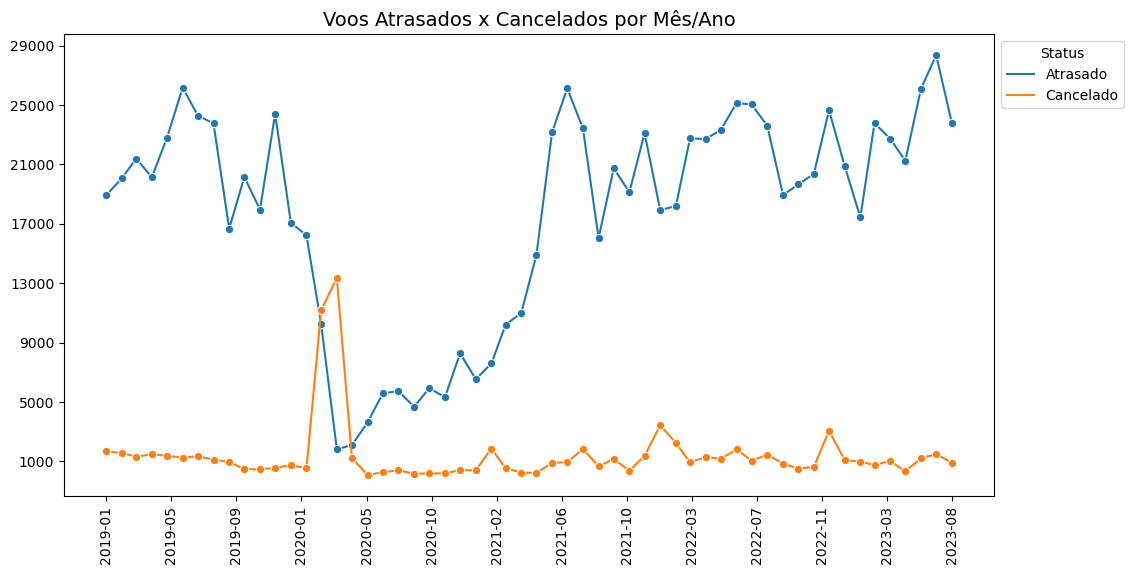

In [75]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_mes_ano, x='mes_ano', y='FL_NUMBER', hue='CANCELLED', marker='o')

# Configuração dos rótulos e título
plt.title('Voos Atrasados x Cancelados por Mês/Ano', fontsize=14)
plt.xlabel(None)
plt.ylabel(None)

# Ajuste valores de mês/ano no eixo X
xticks = pd.date_range(start=grouped_mes_ano['mes_ano'].min(), 
                       end=grouped_mes_ano['mes_ano'].max(), 
                       periods=14) 
plt.xticks(xticks,labels=[d.strftime('%Y-%m') for d in xticks],rotation=90) 

# Ajuste valores do eixo y
plt.yticks(np.linspace(1000, 29000, 8))

# Ajuste da legenda
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))

# Exibição do gráfico
plt.show()

Novamente é possível observar impacto da pandemia nos voos analisados. Conforme gráfico acima, Março e Abril de 2020 são os meses com mais voos cancelados e menos voos atrasados. Este período coincide com o início e pico da pandemia do COVID-19.

A seguir, vamos avaliar as rotas (cidades de origem/destino).

In [16]:
print(f'A base possui voos com origem ou destino em {len(voos.ORIGIN_CITY.value_counts())} cidades dos Estados Unidos')

A base possui voos com origem ou destino em 373 cidades dos Estados Unidos


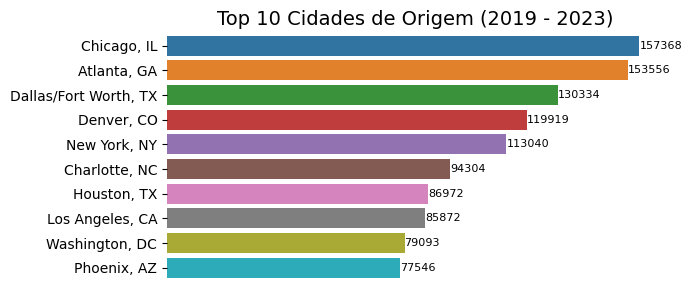

In [17]:
# Agrupamento da base por cidade de origem, ordenação por maior quantidade de voos e filtro 
# para exibir apenas as 10 primeiras posições

origem = voos.groupby('ORIGIN_CITY')['FL_NUMBER'].count().reset_index(name='nº voos').sort_values(by='nº voos',ascending=False)[:10]
origem.reset_index(drop=True)

# Configuração do tamanho da figura
plt.figure(figsize=(7,3))

# Plotagem do gráfico de barras
barplot = sns.barplot(
    data=origem, 
    x='nº voos', 
    y='ORIGIN_CITY', 
    palette="tab10"  # Paleta de cores para diferenciar as cidades
)

# Adicionando os valores centralizados nas barras
for bar, value in zip(barplot.patches, origem['nº voos']):
    plt.text(
        bar.get_width() + 1,        # Posição do texto no eixo X
        bar.get_y() + bar.get_height() / 2,  # Centralização vertical no eixo Y
        f"{value}",                # Valor do texto
        va='center',               # Alinhamento vertical
        fontsize=8                 # Tamanho do texto
    )

# Personalização do gráfico
plt.title('Top 10 Cidades de Origem (2019 - 2023)', fontsize=14)
plt.xlabel(None)  # Remove o título do eixo X
plt.ylabel(None)  # Remove o título do eixo Y
plt.xticks([])    # Remove os rótulos do eixo X

# Removendo as bordas do gráfico
sns.despine(left=True, bottom=True)

# Ajuste automático do layout
plt.tight_layout()

# Exibe o gráfico
plt.show()


Conforme verifica-se acima, as top 10 cidades de onde mais partiram voos, são também as maiores cidades dos seus respectivos estados, com exceção de Dallas/Fort Worth e Washington DC - que embora não faça parte de nenhum estado, é a capital dos Estados Unidos.

A seguir, vamos avaliar as rotas (cidade de origem e destino) dos voos atrasados e cancelados, com a finalidade de buscar alguma relação entre as cidades e os atrasos ou cancelamentos.

In [18]:
# Agrupamento da base por cidade de origem e cidade de destino, ordenação por maior quantidade de voos e filtro 
# para exibir apenas as 10 primeiras posições

origem_destino = tempo_atraso.groupby(['ORIGIN_CITY','DEST_CITY'])['FL_NUMBER'].count().reset_index(name='nº voos').sort_values(by='nº voos',ascending=False)[:10]
origem_destino.reset_index(drop=True)

,ORIGIN_CITY,DEST_CITY,nº voos
0,"Chicago, IL","New York, NY",2372
1,"Atlanta, GA","New York, NY",2175
2,"New York, NY","Chicago, IL",2112
3,"Denver, CO","Chicago, IL",2088
4,"New York, NY","Atlanta, GA",1969
5,"Miami, FL","New York, NY",1959
6,"Chicago, IL","Denver, CO",1767
7,"Chicago, IL","Los Angeles, CA",1734
8,"New York, NY","Boston, MA",1728
9,"New York, NY","Miami, FL",1717


Alguns pontos que podem ser observados nos voos que mais atrasam:

* New York aparece quatro vezes como cidade de origem, e também duas vezes como cidade de destino;

* Chicago é a cidade de origem em três rotas, e de destino, em duas rotas;

* A rota Chicago x New York é a que mais atrasa;

* Com exceção de Boston, demais cidades aparecem no top 10 rotas tanto como cidade de origem como destino de voos, o que pode indicar que os atrasos tem alguma relação com o aeroporto daquela cidade em específico, que acaba por atrasar tanto os voos que partem de lá, como os que lá chegam.

Agora vamos olhar para as rotas que tem mais voos cancelados.


In [19]:
# Agrupamento da base por cidade de origem e cidade de destino, ordenação por maior quantidade de voos e filtro 
# para exibir apenas as 10 primeiras posições

origem_destino_cancel = cancelados.groupby(['ORIGIN_CITY','DEST_CITY'])['FL_NUMBER'].count().reset_index(name='nº voos').sort_values(by='nº voos',ascending=False)[:10]
origem_destino_cancel.reset_index(drop=True)

,ORIGIN_CITY,DEST_CITY,nº voos
0,"New York, NY","Chicago, IL",323
1,"Chicago, IL","New York, NY",318
2,"Boston, MA","New York, NY",244
3,"New York, NY","Boston, MA",216
4,"Washington, DC","New York, NY",203
5,"New York, NY","Washington, DC",190
6,"Houston, TX","Dallas, TX",189
7,"Chicago, IL","Washington, DC",182
8,"Dallas/Fort Worth, TX","Houston, TX",157
9,"Houston, TX","Dallas/Fort Worth, TX",154


Com relação às rotas com voos cancelados, destacam-se as seguintes cidades:

* New York é a cidade de origem de quatro das dez rotas que mais sofrem cancelamentos, e também cidade de destino em outras três rotas deste ranking;

* Chicago aparece duas vezes como cidade de origem, e apenas uma vez como cidade de destino;

* Atlanta, Denver e Miami aparecem como cidade origem no ranking de rotas que mais atrasam, mas não constam neste ranking de rotas com mais voos cancelados;

* Boston, Washington, Houston e Dallas não constavam como cidade de origem das rotas que mais atrasam, mas aparecem neste ranking de rotas com voos cancelados.

Seguindo com a análise, para aqueles voos que o motivo é listado na base, vamos verificar qual a correlação destes motivos com o atraso na partida ou na chegada.

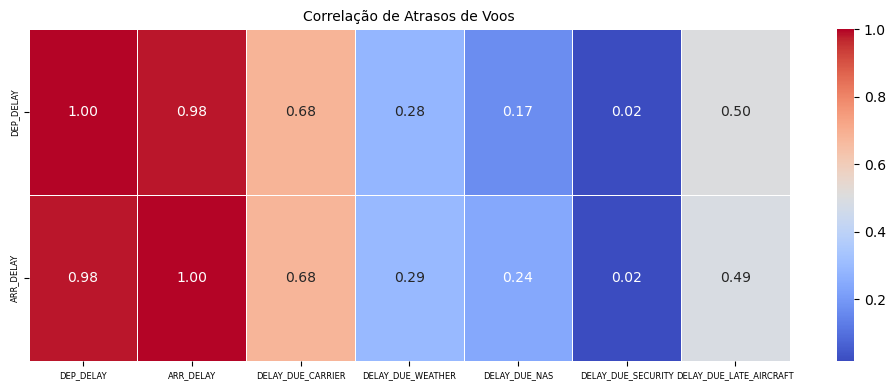

In [20]:
# Seleção das colunas e cálculo da correlação
correlacao = tempo_atraso[['DEP_DELAY', 'ARR_DELAY', 'DELAY_DUE_CARRIER',
                           'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 
                           'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']].corr()

# Selecionando apenas as duas primeiras linhas
correlacao = correlacao.iloc[:2]

# Plotagem do heatmap
plt.figure(figsize=(10, 4))  # Tamanho do gráfico
sns.heatmap(
    correlacao, 
    annot=True,               # Mostra os valores dentro do heatmap
    fmt=".2f",                # Formato dos números (2 casas decimais)
    cmap="coolwarm",          # Mapa de cores
    cbar=True,                # Exibe a barra de cores
    linewidths=0.5,           # Linhas entre os quadrados
    xticklabels=correlacao.columns,  # Rótulos personalizados no eixo X
    yticklabels=correlacao.index     # Rótulos personalizados no eixo Y
)

# Ajuste dos rótulos
plt.xticks(rotation=0, fontsize=6.0)
plt.yticks(fontsize=6)
plt.title("Correlação de Atrasos de Voos", fontsize=10)  # Título do gráfico
plt.tight_layout()  # Ajusta os elementos para evitar sobreposição
plt.show()


Existem diversas tabelas que auxiliam na interpretação dos valores de correlação. Vamos considerar a tabela abaixo, elaborada pelo cientista da computação e diretor de ML do Linkedin, Parvez Ahammad:

|Size of Correlation        |Interpretaion                            |
|---------------------------|-----------------------------------------|
|.90 to 1.00 (-.90 to -1.00)|Very high positive (negative) correlation|
|.70 to .90 (-.70 to -.90) |High positive (negative) correlation|
|.50 to .70 (-.50 to -.70)|Moderate positive (negative) correlation|
|.30 to .50 (-.30 to -.50)|Low positive (negative) correlation|
|.00 to .30 (.00 to -.30)|Negligible correlation|

Com base nestes valores, cabe destacar as seguintes correlações:
* DEP_DELAY e ARR_DELAY - o atraso na partida e na chegada possuem correlação muito alta, alcançando 0.98. Um voo que atrasa na partida, raramente não atrasará sua chegada;
* DELAY_DUE_CARRIER e DEP_DELAY ou ARR_DELAY - o atraso causado pela cia aérea possui alta correlação (0.68) tanto com o atraso na partida como na chegada;
* DELAY_DUE_LATE_AIRCRAFT e DEP_DELAY - o atraso devido a aeronave atrasada possui moderada correlação com o atraso na partida (0.52). Se a aeronave atrasa para chegar, provavelmente atrasará também a próxima partida;
* Demais motivos de atraso possuem correlação baixa com o atraso na partida ou chegada.

Conforme abaixo, quando analisamos estas variáveis graficamente, também é possível visualizar claramente uma linha de regressão linear, confirmando que há uma forte relação positiva entre tais fatores.

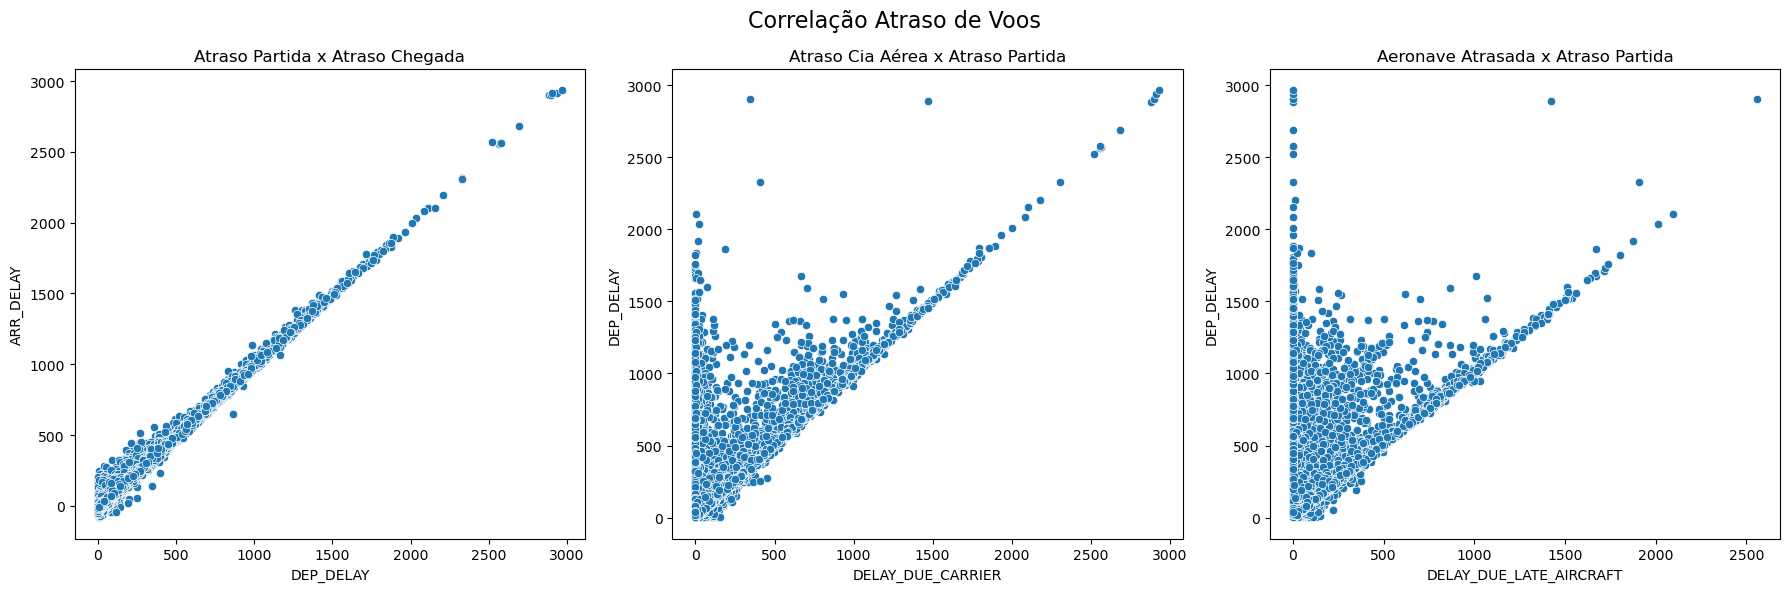

In [21]:
# Criando os subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha, 3 colunas

# Gráfico 1: Atraso Partida x Atraso Chegada
sns.scatterplot(
    x=tempo_atraso['DEP_DELAY'],
    y=tempo_atraso['ARR_DELAY'],
    ax=axes[0]
)
axes[0].set_title('Atraso Partida x Atraso Chegada')

# Gráfico 2: Atraso Cia Aérea x Atraso Partida
sns.scatterplot(
    x=tempo_atraso['DELAY_DUE_CARRIER'],
    y=tempo_atraso['DEP_DELAY'],
    ax=axes[1]
)
axes[1].set_title('Atraso Cia Aérea x Atraso Partida')

# Gráfico 3: Aeronave Atrasada x Atraso Partida
sns.scatterplot(
    x=tempo_atraso['DELAY_DUE_LATE_AIRCRAFT'],
    y=tempo_atraso['DEP_DELAY'],
    ax=axes[2]
)
axes[2].set_title('Aeronave Atrasada x Atraso Partida')

# Ajustando layout geral
plt.suptitle('Correlação Atraso de Voos', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Ajusta o espaço para o título principal
plt.show()


#### **CONCLUSÃO**

Ao analisarmos a quantidade de voos ao longo do período estudado, observa-se que a pandemia da Covid-19 causou um impacto significativo no volume de voos. Em março de 2020, mais de 66 mil voos foram realizados, mas esse número caiu drasticamente para cerca de 18 mil em maio. A recuperação foi gradual, com a quantidade de voos permanecendo abaixo dos níveis de 2019 até maio de 2021, quando finalmente superou a marca de 50 mil voos mensais.

Em relação às companhias aéreas, as cinco que mais realizaram voos durante o período analisado foram a Southwest Airlines Co, Delta Airlines Inc, American Airlines Inc, SkyWest Airlines Inc e United Airlines Inc. A Southwest Airlines, primeira colocada do ranking, superou a segunda colocada em cerca de 180 mil voos, totalizando mais de 577 mil voos.

Ao avaliar a performance das companhias aéreas, podemos destacar os seguintes pontos:

- O percentual de pontualidade foi relativamente baixo, com a Southwest Airlines Co apresentando o maior índice, de apenas 6,67%;
- Observou-se um elevado percentual de voos que partiram adiantados, variando entre 44% e 75%;
- A média de antecipação dos voos foi inferior a 6 minutos, com um desvio padrão de apenas 3,34 minutos, o que indica que, apesar do alto percentual de voos adiantados, o tempo de antecipação foi, de maneira geral, curto;
- O percentual de voos atrasados variou entre 19% e 46%, sendo a Southwest Airlines Co a que apresentou o maior percentual;
- Os percentuais de cancelamento variaram entre 1,21% e 5,57%;
- Curiosamente, a Southwest Airlines Co foi a única entre as 5 maiores companhias em número de voos a figurar também entre as top 5 em termos de voos atrasados e cancelados;
- Em relação aos atrasos, 75,75% dos voos sofreram atrasos de até 1 hora, com 10,89% apresentando atrasos entre 1 e 2 horas;
- A média de atraso foi de 39,53 minutos, enquanto a mediana foi de 17 minutos, indicando uma distribuição assimétrica nos tempos de atraso;
- Embora a Southwest tenha liderado em termos de percentual de atraso, ficou em penúltimo lugar no que diz respeito à média de tempo de atraso (26,47 minutos);
- Ao observar a performance ao longo dos anos, nota-se que os percentuais de pontualidade, atraso e cancelamento se mantiveram estáveis, com exceção do ano de 2020, que foi marcado pelo pico da pandemia de Covid-19.

A base de dados abrange voos com origem ou destino em 373 cidades dos Estados Unidos, com as 10 principais sendo Chicago/IL, Atlanta/GA, Dallas/Fort Worth/TX, Denver/CO, New York/NY, Charlotte/NC, Houston/TX, Los Angeles/CA, Washington/DC e Phoenix/AZ. Exceto por Dallas/Fort Worth e Washington DC, todas as outras cidades estão entre as maiores de seus respectivos estados.

Analisando as 10 rotas com mais voos atrasados e cancelados, os seguintes pontos chamam atenção:

- New York aparece frequentemente como cidade de origem e destino em rotas com grandes volumes de atrasos e cancelamentos, destacando-se em quatro rotas de voos atrasados e em três rotas de voos cancelados;
- Chicago também aparece como cidade de origem e destino em várias rotas, com destaque para a Chicago x New York, que é a rota com mais atrasos, e a New York x Chicago, que é a que mais sofre com cancelamentos.

Por fim, ao analisar as correlações entre os motivos de atraso, observa-se que:

- Existe uma forte correlação entre o atraso na partida e na chegada, indicando que um voo atrasado na partida tende a sofrer atrasos também na chegada;
- A correlação entre o atraso causado pela companhia aérea e os atrasos na partida e na chegada é alta;
- O atraso decorrente da aeronave atrasada tem uma correlação moderada com o atraso na partida.

Os dados analisados forneceram uma visão detalhada sobre o desempenho das companhias aéreas e das rotas mais afetadas ao longo do período avaliado, além de oferecer insights valiosos sobre os fatores que podem influenciar os atrasos e cancelamentos.